# lighteval is your AI evaluation library

This notebook explores how you can use lighteval to evaluate and compare LLMs.

`lighteval` has been around a while and it's a great tool for getting eval score on major benchmarks. It's just been refactored to support being used like a library in Python, which makes it great for comparing models across benchmarks.

So let's dig in to some eval scores.

<div style='background-color: lightblue; padding: 10px; border-radius: 5px; margin-bottom: 20px; color:black'>
    <h2 style='margin: 0;color:blue'>Exercise: Evaluate Your Own Model</h2>
    <p>Now that you've seen how to evaluate models on specific domains, try evaluating a model on a domain that interests you.</p>
    <p><b>Difficulty Levels</b></p>
    <p>🐢 Use the existing medical domain tasks but evaluate a different model from the Hugging Face hub</p>
    <p>🐕 Create a new domain evaluation by selecting different MMLU tasks (e.g., computer science, mathematics, physics)</p>
    <p>🦁 Create a custom evaluation task using LightEval's task framework and evaluate models on your specific domain</p>
</div>

## Install dependencies

In [ ]:
!pip install -qqq -U "torch<2.5" "torchvision<2.5" "torchaudio<2.5" --index-url https://download.pytorch.org/whl/cu121
!pip list | grep torch

In [ ]:
!pip install -qqq git+https://github.com/huggingface/lighteval.git tiktoken
!pip install lighteval[math]

## Setup `lighteval` evaluation

We need to setup the evaluation environment and pipeline. Much of this we will disable because we're keeping things in the notebook, but we could also use `push_to_hub` or `push_to_tensorboard`.

### `push_to_hub`

This is useful if we're evaluating a model and want to persist its evaluation with weights and configuration on the Hugging Face hub.

### `push_to_tensorboard`

This would be useful if we were building an evaluation tool or script, where we wanted to view results within tensorboard.

# Compares models with `lighteval`

We are going to compare two small LLMs on a domain. We will use `Qwen2.5-0.5B` and `SmolLM2-360M-Instruct` and we will evaluate them on a medical domain.

We can create a domain evaluation from a subset of MMLU evaluations, by defining the evaluation tasks. In lighteval, tasks are described as strings.

`{suite}|{task}:{subtask}|{num_few_shot}|{0 or 1 to reduce num_few_shot if prompt is too long}`

Therefore, we will pass our list of medicine related tasks like this:

```
"leaderboard|mmlu:anatomy|5|0,leaderboard|mmlu:professional_medicine|5|0,leaderboard|mmlu:high_school_biology|5|0,leaderboard|mmlu:high_school_chemistry|5|0"
```

Which can be translated to :

| Suite | Task | Num Fewshot Example | Limit Fewshots |
|---|---|---|---|
| leaderboard | mmlu:anatomy | 5 | False |
| leaderboard | mmlu:professional_medicine | 5 | False |
| leaderboard | mmlu:high_school_biology | 5 | False |
| leaderboard | mmlu:high_school_chemistry | 5 | False |

For a full list of lighteval supported tasks. Checkout this page in [the documentation](https://github.com/huggingface/lighteval/wiki/Available-Tasks).

In [1]:
domain_tasks = "leaderboard|mmlu:anatomy|5|0,leaderboard|mmlu:professional_medicine|5|0,leaderboard|mmlu:high_school_biology|5|0,leaderboard|mmlu:high_school_chemistry|5|0"

# Evaluate Qwen2.5 0.5B, SmolLM2-360M-Instruct, and DPO

In [2]:
import lighteval
from lighteval.logging.evaluation_tracker import EvaluationTracker
from lighteval.models.transformers.transformers_model import TransformersModelConfig
from lighteval.pipeline import ParallelismManager, Pipeline, PipelineParameters
from lighteval.utils.imports import is_accelerate_available
from datetime import timedelta, datetime


evaluation_tracker = EvaluationTracker(
    output_dir="~/tmp",
    save_details=True,
    push_to_hub=False
)

pipeline_params = PipelineParameters(
    launcher_type=ParallelismManager.ACCELERATE,
    # Remove the 2 parameters below once your configuration is tested
    # override_batch_size=1,
    max_samples=10
 )

In [3]:
# Evaluate Qwen2.5 0.5B
qwen_model_config = TransformersModelConfig(model_name="Qwen/Qwen2.5-0.5B", dtype="auto", batch_size=16)
pipeline = Pipeline(
    tasks=domain_tasks,
    pipeline_parameters=pipeline_params,
    evaluation_tracker=evaluation_tracker,
    model_config=qwen_model_config,
)
pipeline.evaluate()
qwen_results = pipeline.get_results()

--max_samples WAS SET. THESE NUMBERS ARE ONLY PARTIAL AND SHOULD NOT BE USED FOR COMPARISON UNLESS YOU KNOW WHAT YOU ARE DOING.
If you want to use extended_tasks, make sure you installed their dependencies using `pip install -e .[extended_tasks]`.
0it [00:00, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.56s/it]
1it [01:24, 84.13s/it]
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.45s/it]
2it [01:43, 46.16s/it]
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.26s/it]
3it [02:04, 34.71s/it]
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.09it/s]
4it [02:27, 36.95s/it]


In [4]:
# Evaluate SmolLM 360M
smol_model_config = TransformersModelConfig(model_name="HuggingFaceTB/SmolLM2-360M-Instruct", dtype="auto", batch_size=16)
pipeline = Pipeline(
    tasks=domain_tasks,
    pipeline_parameters=pipeline_params,
    evaluation_tracker=evaluation_tracker,
    model_config=smol_model_config,

)
pipeline.evaluate()
smol_results = pipeline.get_results()


--max_samples WAS SET. THESE NUMBERS ARE ONLY PARTIAL AND SHOULD NOT BE USED FOR COMPARISON UNLESS YOU KNOW WHAT YOU ARE DOING.
If you want to use extended_tasks, make sure you installed their dependencies using `pip install -e .[extended_tasks]`.
0it [00:00, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.47s/it]
1it [01:05, 65.14s/it]
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.13s/it]
2it [01:34, 44.26s/it]
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.02s/it]
3it [02:12, 41.29s/it]
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.37it/s]
4it [02:47, 41.89s/it]


# Visualize Results

Now that we have results from the two models we can visualize them side-by-side. We'll keep visualisation simple here, but with this data structure you could represent scores in many ways.

<Axes: >

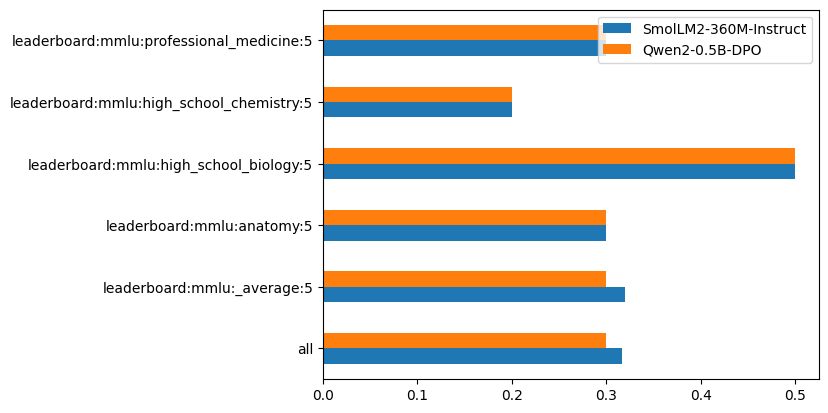

In [5]:
import pandas as pd

df_0 = pd.DataFrame.from_records(smol_results["results"]).T["acc"].rename("SmolLM2-360M-Instruct")
df_1 = pd.DataFrame.from_records(qwen_results["results"]).T["acc"].rename("Qwen2-0.5B-DPO")
df_0 = pd.concat([df_0, df_1], axis=1)
df_0.plot(kind="barh")

# 💐 That's it!

You have a handy notebook to view model evals. You could use this to:

- select the right model for your inference use case
- evaluate checkpoints during training
- share model scores

🏃Next Steps

- If you want to go deeper into your evaluation results check out this [notebook](https://github.com/huggingface/evaluation-guidebook/blob/main/contents/examples/comparing_task_formulations.ipynb)
